In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [5]:
from keras.datasets import mnist

In [6]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [8]:
x_train[0]#0 -> black , 255 -> white

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
y_train[0]

5

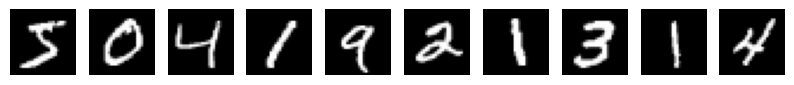

label for each of the above image: [5 0 4 1 9 2 1 3 1 4]


In [10]:
%matplotlib inline
plt.figure(figsize = (10 , 1))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' %(y_train[0:10]))

Normalizing train and test data

In [11]:
# flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

# normalize inputs from 0-255 to 0-1
x_train = x_train/255.0
x_test = x_test/255.0

print('Training set',x_train.shape,y_train.shape)
print('Test set', x_test.shape,y_test.shape)

Training set (60000, 784) (60000,)
Test set (10000, 784) (10000,)


OHE the categorical variable

In [12]:
#convert to one hot vectors using the to_categorical function
num_classes = 10
y_train = to_categorical(y_train,num_classes)
y_test_cat = to_categorical(y_test,num_classes)

In [13]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

Defining the sequential model

In [11]:
#define model

from tensorflow.keras import losses,optimizers,Sequential
from tensorflow.keras.layers import Dense

image_size = 28*28
  
model = Sequential()

model.add(Dense(num_classes, activation='softmax', kernel_initializer='he_uniform',input_shape = (image_size,)))

In [12]:
# compile model
adam = optimizers.Adam(learning_rate=1e-3)
model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
#Checkpoint
checkpoint = ModelCheckpoint("model_weights.weights.h5", monitor = "val_accuracy",
                            save_weights_only = True,save_best_only = True, mode = 'max', verbose = 1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1, patience=2,min_lr = 0.00001,model='auto')
callbacks = [checkpoint,reduce_lr]

In [17]:
history = model.fit(x_train,y_train, validation_split=0.2, epochs = 30,batch_size = 128, verbose = 2, callbacks = callbacks)

Epoch 1/30

Epoch 1: val_accuracy improved from -inf to 0.94192, saving model to model_weights.weights.h5
375/375 - 2s - 4ms/step - accuracy: 0.9362 - loss: 0.2318 - val_accuracy: 0.9419 - val_loss: 0.2156 - learning_rate: 0.0010
Epoch 2/30

Epoch 2: val_accuracy did not improve from 0.94192
375/375 - 1s - 2ms/step - accuracy: 0.9362 - loss: 0.2308 - val_accuracy: 0.9417 - val_loss: 0.2190 - learning_rate: 0.0010
Epoch 3/30

Epoch 3: val_accuracy did not improve from 0.94192
375/375 - 1s - 2ms/step - accuracy: 0.9361 - loss: 0.2308 - val_accuracy: 0.9402 - val_loss: 0.2206 - learning_rate: 0.0010
Epoch 4/30

Epoch 4: val_accuracy did not improve from 0.94192
375/375 - 1s - 2ms/step - accuracy: 0.9374 - loss: 0.2273 - val_accuracy: 0.9408 - val_loss: 0.2204 - learning_rate: 1.0000e-04
Epoch 5/30

Epoch 5: val_accuracy did not improve from 0.94192
375/375 - 1s - 2ms/step - accuracy: 0.9376 - loss: 0.2272 - val_accuracy: 0.9404 - val_loss: 0.2206 - learning_rate: 1.0000e-04
Epoch 6/30

Ep

In [16]:
from tensorflow.keras.models import load_model
from tensorflow.keras import optimizers, losses
model.load_weights('model_weights.weights.h5')
adam = optimizers.Adam(learning_rate=1e-3)
model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

# Define callbacks
checkpoint = ModelCheckpoint("model_weights.weights.h5", monitor="val_accuracy",
                             save_weights_only=True,save_best_only=True, mode='max', verbose=1)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=0.00001)

callbacks = [checkpoint, reduce_lr]

# Continue training
history = model.fit(
    x_train, y_train,  # Replace with your training data
    epochs=20,  # Set the number of additional epochs
   # validation_data=(x_val, y_val),  # Replace with your validation data
    callbacks=callbacks
)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9281 - loss: 0.2586 - learning_rate: 0.0010
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9298 - loss: 0.2530 - learning_rate: 0.0010
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9311 - loss: 0.2489 - learning_rate: 0.0010
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9320 - loss: 0.2476 - learning_rate: 0.0010
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9303 - loss: 0.2515 - learning_rate: 0.0010
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9331 - loss: 0.2447 - learning_rate: 0.0010
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9325 - loss: 0.2440 - learning_rate: 0.0010
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9346 - loss: 0.2424 - learning_rate: 0.0010
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9326 - loss: 0.2438 - learning_rate:

In [65]:
'''from tensorflow.keras.models import Model
from tensorflow.keras import optimizers, losses
from tensorflow.keras.callbacks import ModelCheckpoint

# Define your model architecture here
model = ...  # Your model definition

# Compile the model
adam = optimizers.Adam(learning_rate=1e-3)
model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])

# Define the checkpoint callback to save the best model weights
checkpoint = ModelCheckpoint(
    'model_weights_best.weights.h5',  # Path where the best weights will be saved
    monitor='val_accuracy',           # Metric to monitor
    save_weights_only=True,            # Save only weights
    save_best_only=True,               # Save only the best weights
    mode='max',                       # Mode is 'max' for accuracy
    verbose=1                         # Verbosity mode
)

# Train the model
history = model.fit(
    x_train, y_train,                # Your training data
    epochs=additional_epochs,        # Number of epochs to train
    validation_data=(x_val, y_val),  # Your validation data
    callbacks=[checkpoint]           # Callbacks to use
)
'''

"from tensorflow.keras.models import Model\nfrom tensorflow.keras import optimizers, losses\nfrom tensorflow.keras.callbacks import ModelCheckpoint\n\n# Define your model architecture here\nmodel = ...  # Your model definition\n\n# Compile the model\nadam = optimizers.Adam(learning_rate=1e-3)\nmodel.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])\n\n# Define the checkpoint callback to save the best model weights\ncheckpoint = ModelCheckpoint(\n    'model_weights_best.weights.h5',  # Path where the best weights will be saved\n    monitor='val_accuracy',           # Metric to monitor\n    save_weights_only=True,            # Save only weights\n    save_best_only=True,               # Save only the best weights\n    mode='max',                       # Mode is 'max' for accuracy\n    verbose=1                         # Verbosity mode\n)\n\n# Train the model\nhistory = model.fit(\n    x_train, y_train,                # Your training data\n    epochs=addit

In [18]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [19]:
y_pred[0]

array([8.1237683e-09, 5.6109915e-15, 6.0138717e-08, 4.3769195e-03,
       8.2659128e-08, 1.6191174e-05, 9.8698981e-15, 9.9536800e-01,
       7.6504666e-06, 2.3103679e-04], dtype=float32)

In [20]:
y_pred_final = []
for i in y_pred:
    y_pred_final.append(np.argmax(i))

In [21]:
y_pred_final[0]

7

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.93      0.91      0.92      1032
           3       0.91      0.91      0.91      1010
           4       0.94      0.93      0.94       982
           5       0.91      0.87      0.89       892
           6       0.94      0.95      0.95       958
           7       0.93      0.93      0.93      1028
           8       0.88      0.90      0.89       974
           9       0.91      0.91      0.91      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



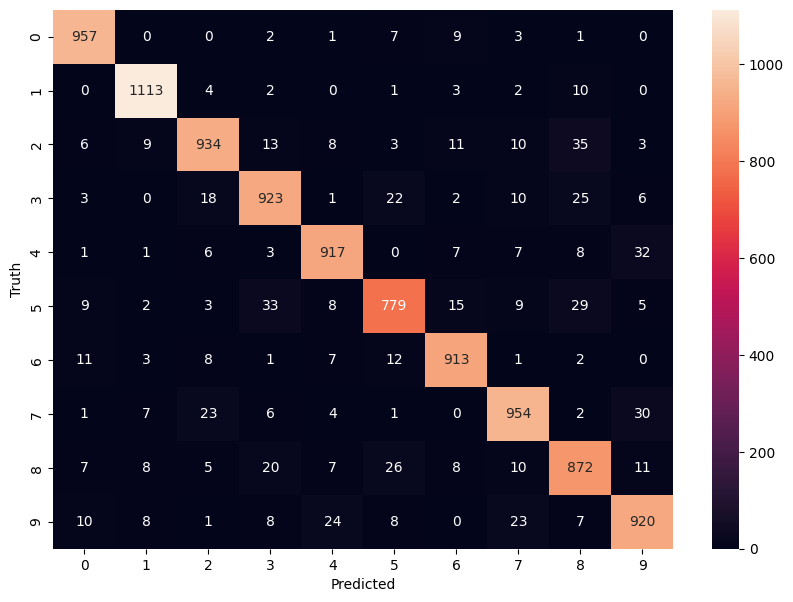

In [25]:
import seaborn as sns
cm = confusion_matrix(y_test,y_pred_final)
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True,fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [26]:
#define model

from tensorflow.keras import losses,optimizers,Sequential
from tensorflow.keras.layers import Dense

image_size = 28*28
  
model = Sequential()

model.add(Dense(256, activation='relu', kernel_initializer = 'he_uniform',input_shape = (image_size,)))
model.add(Dense(128, activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dense(64, activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dense(32, activation='relu',kernel_initializer = 'he_uniform'))

model.add(Dense(num_classes,activation='softmax'))

In [27]:
# compile model
adam = optimizers.Adam(learning_rate=1e-3)
model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])


In [28]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 244,522 (955.16 KB)

 Trainable params: 244,522 (955.16 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
#Checkpoint
checkpoint = ModelCheckpoint("model_weights.weights.h5", monitor = "val_accuracy",
                            save_weights_only = True,save_best_only = True, mode = 'max', verbose = 1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1, patience=2,min_lr = 0.00001,model='auto')
callbacks = [checkpoint,reduce_lr]

In [30]:
history = model.fit(x_train,y_train, validation_split=0.2, epochs = 30,batch_size = 128, verbose = 2, callbacks = callbacks)

Epoch 1/30

Epoch 1: val_accuracy improved from -inf to 0.95558, saving model to model_weights.weights.h5
375/375 - 5s - 13ms/step - accuracy: 0.9030 - loss: 0.3228 - val_accuracy: 0.9556 - val_loss: 0.1479 - learning_rate: 0.0010
Epoch 2/30

Epoch 2: val_accuracy improved from 0.95558 to 0.96000, saving model to model_weights.weights.h5
375/375 - 2s - 5ms/step - accuracy: 0.9652 - loss: 0.1157 - val_accuracy: 0.9600 - val_loss: 0.1293 - learning_rate: 0.0010
Epoch 3/30

Epoch 3: val_accuracy improved from 0.96000 to 0.96933, saving model to model_weights.weights.h5
375/375 - 2s - 5ms/step - accuracy: 0.9763 - loss: 0.0784 - val_accuracy: 0.9693 - val_loss: 0.1010 - learning_rate: 0.0010
Epoch 4/30

Epoch 4: val_accuracy improved from 0.96933 to 0.97250, saving model to model_weights.weights.h5
375/375 - 2s - 5ms/step - accuracy: 0.9827 - loss: 0.0539 - val_accuracy: 0.9725 - val_loss: 0.0977 - learning_rate: 0.0010
Epoch 5/30

Epoch 5: val_accuracy did not improve from 0.97250
375/375

In [31]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [32]:
y_pred_final = []
for i in y_pred:
    y_pred_final.append(np.argmax(i))

In [33]:
y_pred_final[0]

7

In [34]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.99      0.98      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



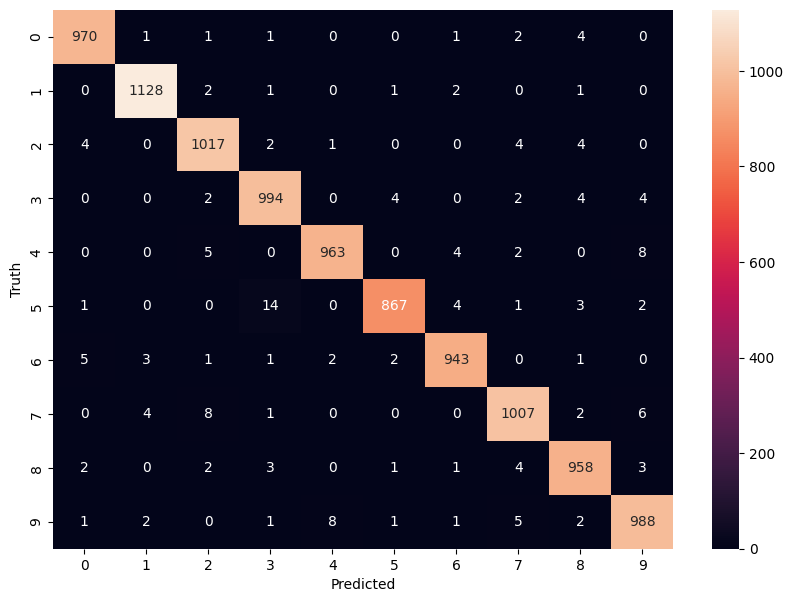

In [35]:
cm = confusion_matrix(y_test,y_pred_final)
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True,fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [36]:
index = 0
misclassified_images = []
for label, predict in zip(y_test, y_pred_final):
    if label != predict: 
        misclassified_images.append(index)
    index +=1
print(misclassified_images)
print(len(misclassified_images))

[8, 151, 247, 259, 321, 340, 445, 495, 582, 619, 659, 674, 684, 707, 720, 900, 965, 1003, 1014, 1039, 1044, 1112, 1156, 1178, 1226, 1232, 1242, 1247, 1289, 1299, 1319, 1328, 1393, 1395, 1522, 1530, 1549, 1681, 1717, 1754, 1790, 1878, 1901, 2004, 2016, 2053, 2098, 2109, 2118, 2135, 2148, 2185, 2224, 2291, 2293, 2333, 2369, 2387, 2414, 2488, 2597, 2607, 2648, 2654, 2810, 2877, 2896, 2921, 2927, 2939, 2979, 3073, 3117, 3222, 3289, 3405, 3422, 3451, 3490, 3503, 3520, 3534, 3558, 3776, 3780, 3808, 3838, 3853, 3869, 3893, 3902, 3906, 3941, 3943, 3985, 4027, 4065, 4078, 4176, 4199, 4248, 4289, 4294, 4405, 4425, 4433, 4497, 4536, 4731, 4740, 4807, 4823, 4880, 4966, 5046, 5140, 5331, 5600, 5642, 5676, 5936, 5937, 5955, 5972, 5973, 5982, 6011, 6023, 6046, 6059, 6532, 6555, 6571, 6576, 6597, 6641, 6651, 6755, 6783, 6847, 7216, 8094, 8277, 8325, 8410, 8527, 9009, 9015, 9024, 9422, 9587, 9634, 9664, 9679, 9729, 9745, 9768, 9770, 9779, 9792, 9808, 9839, 9904, 9944, 9982]
165


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Was predicted  2
Was labeled  7
Predicted Probabilities:  [[2.6765538e-11 7.9622914e-08 9.9971050e-01 8.6896114e-05 4.8723131e-12
  5.0545357e-10 4.3000052e-12 2.0250652e-04 1.6921117e-10 6.4922206e-10]]


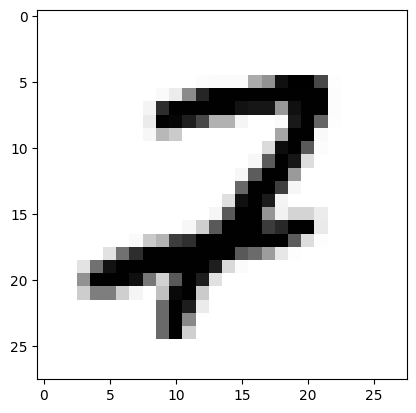

In [40]:
image_index = 9024
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(-1, 784))
print("Was predicted ",pred.argmax())
print("Was labeled ",y_test[image_index])
print("Predicted Probabilities: ",pred)

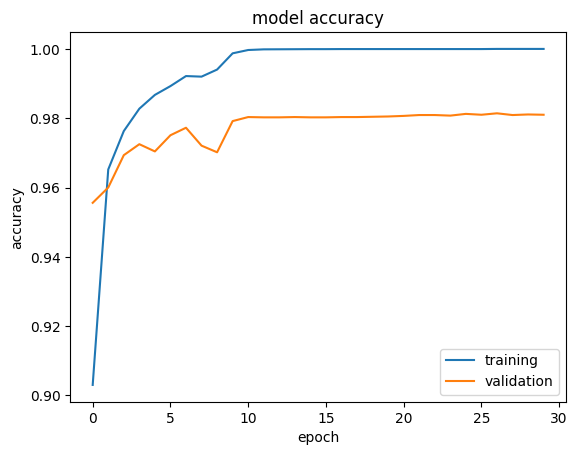

In [41]:
loss, accuracy  = model.evaluate(x_test, y_test_cat, verbose=False)
    
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [71]:
from tensorflow.keras import losses, optimizers
from keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout

In [72]:
image_size = 28*28
model_1 = Sequential()

model_1.add(Dense(256, activation='relu', kernel_initializer = 'he_uniform', input_shape = (image_size,)))
model_1.add(Dense(64 , activation='relu', kernel_initializer = 'he_uniform'))
model_1.add(Dense(64 , activation='relu', kernel_initializer = 'he_uniform'))
model_1.add(Dense(32 , activation='relu', kernel_initializer = 'he_uniform'))
model_1.add(Dropout(0.5))
model_1.add(BatchNormalization())
model_1.add(Dense(num_classes, activation='softmax'))

In [73]:
adam = optimizers.Adam(learning_rate=1e-3)
model_1.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])

In [74]:
model_1.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                     │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 224,106 (875.41 KB)

 Trainable params: 224,042 (875.16 KB)

 Non-trainable params: 64 (256.00 B)

In [75]:
#Checkpoint
checkpoint = ModelCheckpoint("model_weights_1.weights.h5", monitor = "val_accuracy",
                            save_weights_only = True,save_best_only = True, mode = 'max', verbose = 1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1, patience=2,min_lr = 0.00001,model='auto')
callbacks = [checkpoint,reduce_lr]

In [76]:
history = model_1.fit(x_train,y_train, validation_split=0.2, epochs = 35,batch_size = 128, verbose = 2, callbacks = callbacks)

Epoch 1/35

Epoch 1: val_accuracy improved from -inf to 0.94808, saving model to model_weights_1.weights.h5
375/375 - 10s - 26ms/step - accuracy: 0.7443 - loss: 0.9082 - val_accuracy: 0.9481 - val_loss: 0.2196 - learning_rate: 0.0010
Epoch 2/35

Epoch 2: val_accuracy improved from 0.94808 to 0.96025, saving model to model_weights_1.weights.h5
375/375 - 3s - 8ms/step - accuracy: 0.8963 - loss: 0.3864 - val_accuracy: 0.9603 - val_loss: 0.1394 - learning_rate: 0.0010
Epoch 3/35

Epoch 3: val_accuracy improved from 0.96025 to 0.96817, saving model to model_weights_1.weights.h5
375/375 - 3s - 8ms/step - accuracy: 0.9246 - loss: 0.2734 - val_accuracy: 0.9682 - val_loss: 0.1130 - learning_rate: 0.0010
Epoch 4/35

Epoch 4: val_accuracy improved from 0.96817 to 0.96983, saving model to model_weights_1.weights.h5
375/375 - 3s - 8ms/step - accuracy: 0.9402 - loss: 0.2141 - val_accuracy: 0.9698 - val_loss: 0.1092 - learning_rate: 0.0010
Epoch 5/35

Epoch 5: val_accuracy improved from 0.96983 to 0.

In [77]:
y_pred = model_1.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [78]:
y_pred_final = []
for i in y_pred:
    y_pred_final.append(np.argmax(i))

In [79]:
y_pred_final[0]


7

In [80]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.98      0.98       892
           6       0.98      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



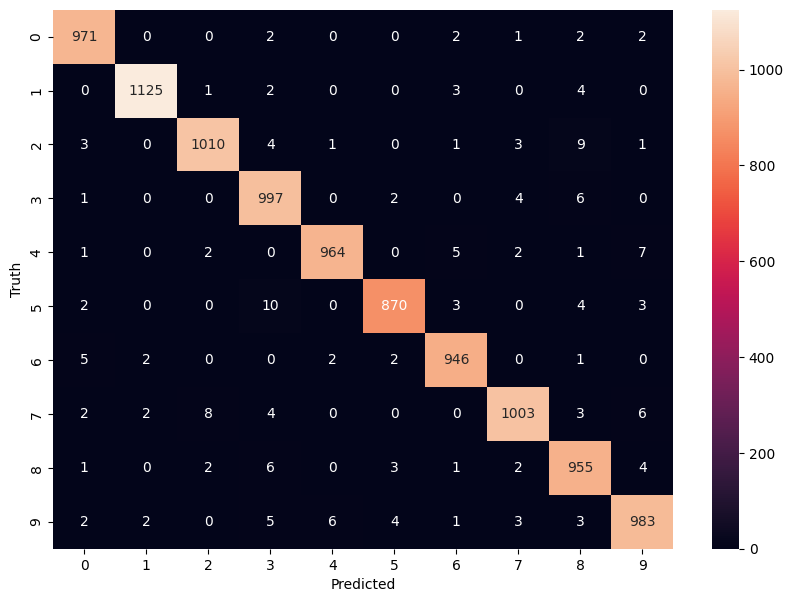

In [81]:
import seaborn as sns
cm = confusion_matrix(y_test,y_pred_final)
plt.figure(figsize = (10,7))
sns.heatmap(cm,annot=True,fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [82]:
index = 0
misclassified_images = []
for label, predict in zip(y_test, y_pred_final):
    if label != predict: 
        misclassified_images.append(index)
    index +=1
print(misclassified_images)
print(len(misclassified_images))

[149, 151, 247, 321, 340, 412, 445, 551, 582, 613, 619, 684, 720, 900, 947, 951, 956, 965, 1003, 1014, 1112, 1156, 1194, 1226, 1232, 1247, 1260, 1299, 1319, 1328, 1378, 1393, 1395, 1494, 1522, 1530, 1549, 1553, 1609, 1611, 1621, 1681, 1709, 1732, 1790, 1868, 1871, 1901, 1941, 1987, 2035, 2053, 2070, 2098, 2109, 2130, 2135, 2224, 2291, 2369, 2387, 2395, 2406, 2488, 2648, 2654, 2877, 2896, 2939, 2953, 3117, 3289, 3422, 3451, 3475, 3503, 3520, 3533, 3534, 3558, 3559, 3604, 3767, 3776, 3780, 3808, 3853, 3876, 3893, 3906, 3941, 3976, 3985, 4065, 4075, 4078, 4102, 4163, 4176, 4199, 4224, 4248, 4289, 4294, 4425, 4497, 4536, 4571, 4639, 4731, 4740, 4807, 4823, 4860, 4880, 4966, 5331, 5409, 5457, 5634, 5642, 5654, 5676, 5734, 5749, 5887, 5936, 5937, 5955, 5972, 5973, 6011, 6023, 6046, 6166, 6168, 6173, 6555, 6559, 6560, 6571, 6574, 6597, 6651, 6744, 6755, 6783, 6847, 7216, 7434, 7921, 8062, 8094, 8160, 8325, 8408, 8527, 9009, 9015, 9019, 9024, 9280, 9540, 9587, 9634, 9664, 9692, 9700, 9729, 974

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Was predicted  0
Was labeled  6
Predicted Probabilities:  [[9.8685765e-01 6.0158523e-06 6.3531246e-05 9.9844701e-06 8.1009202e-06
  9.6976974e-06 1.2384921e-02 8.2186179e-06 6.3382654e-04 1.7910654e-05]]


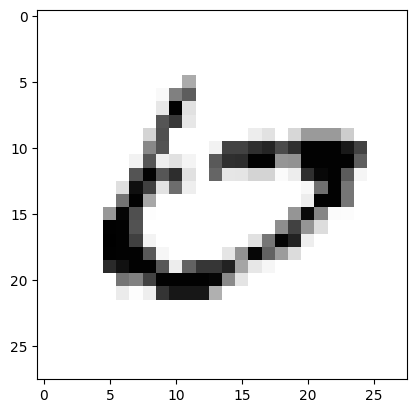

In [83]:
image_index = 445
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model_1.predict(x_test[image_index].reshape(-1, 784))
print("Was predicted ",pred.argmax())
print("Was labeled ",y_test[image_index])
print("Predicted Probabilities: ",pred)

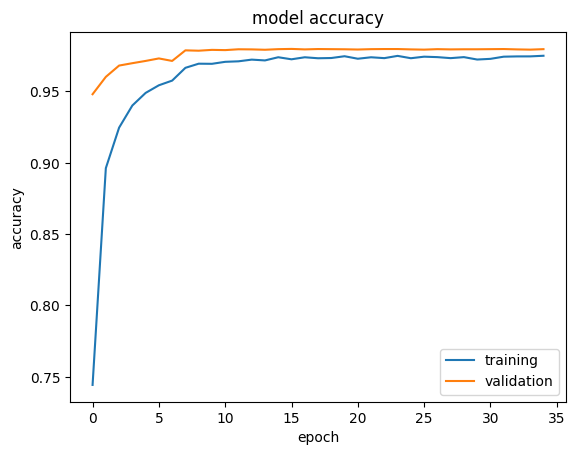

In [84]:
loss, accuracy  = model_1.evaluate(x_test, y_test_cat, verbose=False)
    
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()